# **Análisis Exploratorio de Datos (EDA)**  

## **Objetivos**  

Al completar esta practica, serás capaz de:  

✅ **Explorar** características clave para predecir el precio de un automóvil.  
✅ **Analizar** patrones y realizar un análisis estadístico descriptivo.  
✅ **Agrupar** datos según parámetros específicos y crear tablas dinámicas.  
✅ **Identificar** el efecto de atributos independientes sobre el precio de los automóviles.  

## **Tabla de contenidos**  

1. Importar datos desde un módulo
2. Análisis de patrones individuales mediante visualización  
3. Análisis estadístico descriptivo
4. Fundamentos de agrupación
5. Correlación y causalidad



## **1. Características que más mpactan el precio del utomóvil**  

Para determinar qué características influyen más en el precio de un automóvil, analizaremos variables clave como:  

- **Marca y modelo**: Algunas marcas tienen mayor valor en el mercado.  
- **Año de fabricación**: Modelos más recientes suelen ser más costosos.  
- **Kilometraje**: Un mayor uso del vehículo tiende a reducir su precio.  
- **Tipo de combustible**: Los autos eléctricos pueden tener un valor diferente a los de gasolina o diésel.  
- **Potencia del motor**: Motores más potentes suelen estar asociados con precios más altos.  
- **Equipamiento y tecnología**: Sensores, GPS, y sistemas de seguridad aumentan el valor.  

---

## **2. Importación de datos

### **2.1 Configuración inicial**  

Antes de comenzar, importemos las bibliotecas necesarias.  



In [ ]:
# Importación de bibliotecas esenciales
import pandas as pd  # Manejo de datos tabulares
import numpy as np  # Operaciones numéricas
import matplotlib.pyplot as plt  # Gráficos básicos
import seaborn as sns  # Visualización avanzada
import gdown

# Configuración para mejorar la visualización de gráficos
sns.set(style="whitegrid")

# Opción para mostrar todas las columnas del DataFrame
pd.set_option('display.max_columns', None)

## **3. Descarga y carga del conjunto de datos** 📥  

Ejecuta la celda a continuación para descargar y cargar el conjunto de datos en un **DataFrame de Pandas**.   

Para acceder al archivo en Google Drive, utilizaremos la biblioteca `gdown`, que permite descargar archivos compartidos mediante un enlace público.  


In [ ]:
# Enlace de Google Drive (compartido)
file_url = "https://drive.google.com/uc?id=1tqfwb855k4IbdTVVo51dvnV0IzzH8-JB"

# Definir nombre del archivo de salida
output_file = "automobileEDA.csv"

# Descargar el archivo desde Google Drive
gdown.download(file_url, output_file, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1tqfwb855k4IbdTVVo51dvnV0IzzH8-JB
To: /content/automobileEDA.csv
100%|██████████| 35.6k/35.6k [00:00<00:00, 30.1MB/s]


'automobileEDA.csv'

Una vez cargado, podemos proceder con el análisis exploratorio. 🚀



In [ ]:
# Cargar los datos en un DataFrame
df = pd.read_csv(output_file)

# Mostrar las primeras filas del DataFrame
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## **3.2 Nota sobre la carga de datos en diferentes entornos** 📝  

🔹 **Para usuarios de JupyterLite:**  
Este entorno requiere que el dataset esté descargado en la interfaz antes de poder cargarlo. Sigue los pasos anteriores para descargarlo y luego usa `pd.read_csv("automobileEDA.csv")` para abrirlo.  

🔹 **Para usuarios de Jupyter Anaconda o Google Colab:**  
Puedes **omitir la descarga manual** y cargar los datos directamente desde la URL con `pandas.read_csv()`.  

Si estás trabajando en **Jupyter Anaconda**, descomenta y ejecuta el siguiente código:  

```python
# URL directa del archivo CSV
file_url = "https://drive.google.com/uc?id=1tqfwb855k4IbdTVVo51dvnV0IzzH8-JB"





# **4. Análisis de patrones en características individuales usando visualización** 📊  

Para entender mejor la relación entre las características de los automóviles y su precio, utilizaremos **gráficos**.  



In [ ]:
# Asegurar que los gráficos se muestren en el cuaderno
%matplotlib inline

## **5. Identificación de tipos de datos en el conjunto de datos** 🔍  

Antes de realizar cualquier análisis, es importante conocer los **tipos de datos** de cada columna en nuestro DataFrame.  

🔹 ***¿Por qué es importante esto?***  
- Nos ayuda a identificar qué columnas contienen **valores numéricos** y cuáles contienen **datos categóricos**.  
- Algunas operaciones matemáticas o gráficas solo pueden realizarse en **datos numéricos**.  
- Si hay **errores de tipo de dato**, podremos corregirlos antes del análisis.  

### **5.1 Mostrar tipos de datos de cada columna**  

Con el siguiente código se listaran los tipos de datos en el DataFrame:  




In [ ]:
# Mostrar los tipos de datos de cada columna
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


## **6. Identificación del tipo de dato de la columna "peak-rpm"** 🔎  

Para determinar el tipo de dato de la columna `"peak-rpm"`, utilizamos el método `.dtypes`.  




In [ ]:
# Mostrar el tipo de dato de la columna "peak-rpm"
df['peak-rpm'].dtypes

dtype('float64')

## **2. Cálculo de correlación entre variables seleccionadas** 🔗  

El análisis de correlación nos permite determinar el grado de relación entre diferentes variables numéricas. En este caso, queremos encontrar la correlación entre las siguientes características del automóvil:  

- **bore** (diámetro del cilindro)  
- **stroke** (longitud de la carrera del pistón)  
- **compression-ratio** (relación de compresión del motor)  
- **horsepower** (potencia en caballos de fuerza)  



In [ ]:
# Calcular la correlación

# Seleccionar las columnas de interés
selected_columns = ['bore', 'stroke', 'compression-ratio', 'horsepower']
df_selected = df[selected_columns]

# Calcular la matriz de correlación
correlation_matrix = df_selected.corr()

# Mostrar la matriz de correlación
correlation_matrix

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


## **3. Variables numéricas continuas y su relación con el precio** 📊  

Las **variables numéricas continuas** pueden tomar cualquier valor dentro de un rango. Estas variables suelen ser de tipo `int64` o `float64`.  

Una forma efectiva de visualizar su relación con el precio es mediante **gráficos de dispersión (scatterplots) con líneas de regresión ajustadas**. Esto nos permitirá evaluar posibles relaciones lineales entre una característica y el precio.  

### ** Relación lineal positiva: Tamaño del motor y precio**  
Vamos a analizar la relación entre **"engine-size" (tamaño del motor)** y **"price" (precio del automóvil)**.



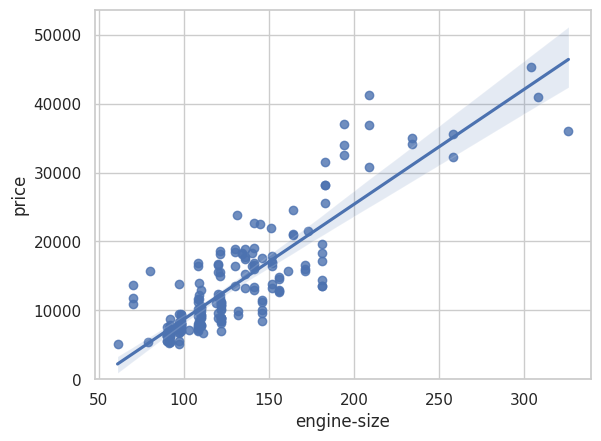

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


In [ ]:
# Creacion de gráfico de dispersión con línea de regresión
sns.regplot(x="engine-size", y="price", data=df)

# Establecimiento de límites en el eje Y para mejor visualización
plt.ylim(0,)

# Mostrar el gráfico
plt.show()

# Calcular la correlación entre "engine-size" y "price"
df[["engine-size", "price"]].corr()


### ** Relación lineal débil: Peak RPM y precio** 🔄  

Ahora evaluaremos si **"peak-rpm"** (revoluciones por minuto máximas) es un buen predictor del **precio del automóvil**.

### **Visualización de la relación**  




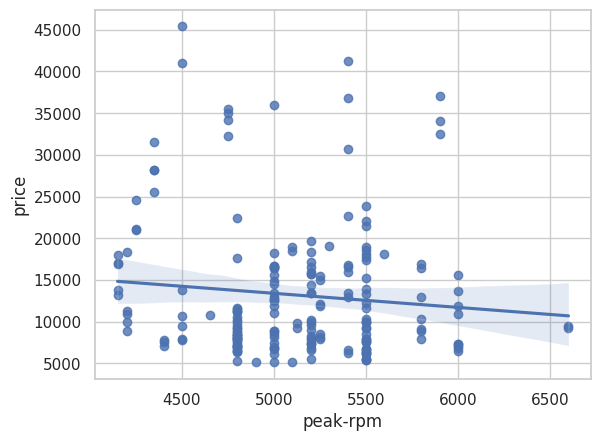

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


In [ ]:
# Creacion de gráfico de dispersión con línea de regresión
sns.regplot(x="peak-rpm", y="price", data=df)

# Mostrar el gráfico
plt.show()

# Calcular la correlación entre "peak-rpm" y "price"
df[["peak-rpm", "price"]].corr()

### ** Análisis de correlación: Stroke y precio** 🔍📊  

En esta sección analizaremos la relación entre **"stroke" (carrera del pistón)** y el **precio del automóvil**.  



In [ ]:
# Calcular la correlación entre "stroke" y "price"
df[["stroke", "price"]].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


## ** ¿*Existe una relación lineal entre "stroke" y "price*"?** 🤔📉  

En esta parte **verificaremos visualmente** si existe una **relación lineal** entre **"stroke" (carrera del pistón)** y **"price" (precio del automóvil)** mediante un **gráfico de regresión**.

### 📌 **Hipótesis previa**
Dado que la correlación entre "stroke" y "price" es **muy débil (≈ 0.0823)**, **no se espera una relación lineal clara**.




### 🔹 **Visualización con Regplot**

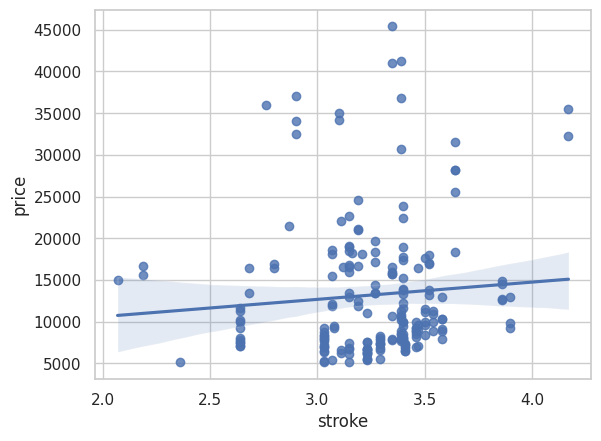

In [ ]:
# Generar gráfico de dispersión con línea de regresión
sns.regplot(x="stroke", y="price", data=df)

# Mostrar gráfico
plt.show()


## ** Análisis de variables categóricas** 📊🚗  

Las **variables categóricas** representan características cualitativas, como el **tipo de carrocería**, **ubicación del motor**, o **tipo de tracción**.  
Un método eficaz para analizarlas es mediante **boxplots**, ya que permiten visualizar la **distribución de precios en cada categoría**.  





### 🔹 ** Relación entre "body-style" y "price"**  

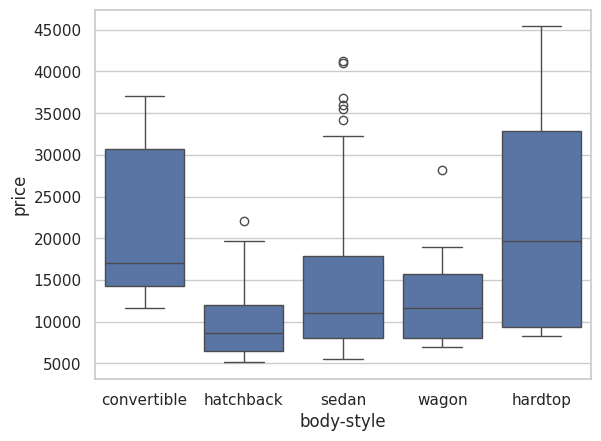

In [ ]:
# Gráfico de caja para body-style vs price
sns.boxplot(x="body-style", y="price", data=df)

# Mostrar gráfico
plt.show()

## **4. Análisis Estadístico Descriptivo** 📊🔍  

Para comprender mejor nuestro conjunto de datos, utilizamos **estadísticas descriptivas**. La función `describe()` de Pandas nos permite obtener **medidas resumen** de todas las **variables continuas** del DataFrame.  





### 🔹 **Estadísticas descriptivas para variables numéricas**  

In [ ]:
# Obtener estadísticas descriptivas para variables numéricas
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


📊 **¿Qué nos muestra este análisis?**

**count:** Número total de valores no nulos.

**mean:** Media aritmética.

**std:** Desviación estándar.

**min:** Valor mínimo.

**25%, 50%, 75%:** Percentiles (IQR - Rango Intercuartil).

**max:** Valor máximo.

**Estadísticas descriptivas para variables categóricas**

Por defecto, describe() ignora las variables categóricas. Para incluirlas, utilizamos:

In [ ]:
# Estadísticas descriptivas para variables categóricas
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


📊 **¿Qué nos muestra este análisis?**

**count:** Número total de valores no nulos.

**unique:** Número de categorías únicas.

**top:** Categoría más frecuente.

**freq:** Frecuencia de la categoría más común.

**Análisis de valores faltantes**

In [ ]:
# Contar valores nulos en cada columna
df.isnull().sum()

,0
symboling,0
normalized-losses,0
make,0
aspiration,0
num-of-doors,0
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0
length,0


✅ Esto nos permite identificar variables con datos faltantes, para decidir cómo manejarlas (rellenar valores, eliminar filas, etc.).

###🚀 **Conclusión**

`describe()` proporciona una visión rápida de la distribución de los datos.

Permite identificar valores extremos, entender la variabilidad, y ver la distribución de datos categóricos.

Próximo paso: Identificar correlaciones y posibles outliers para una limpieza más profunda.

## **5. Análisis de frecuencia con `value_counts()`** 📊🔢  

El método `value_counts()` nos permite **contar la frecuencia de aparición** de cada valor en una columna específica. Esto nos ayuda a entender la **distribución** de las categorías dentro de una variable.  


### 🔹 **Análisis de "`drive-wheels`"** 🚗  
Primero, veamos cuántos autos hay para cada tipo de tracción:

In [ ]:
# Contar valores únicos de "drive-wheels"
df['drive-wheels'].value_counts()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


**Convertir a DataFrame** 🗂️

Podemos transformar la serie en un DataFrame para facilitar su manipulación:

In [ ]:
# Convertir a DataFrame y renombrar columnas
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.reset_index(inplace=True)
drive_wheels_counts.rename(columns={'index': 'drive-wheels', 'drive-wheels': 'value_counts'}, inplace=True)

# Mostrar resultados
drive_wheels_counts

,value_counts,count
0,fwd,118
1,rwd,75
2,4wd,8


**Análisis de "engine-location" 🔧**

In [ ]:
# Contar valores únicos de "engine-location"
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'

# Mostrar los primeros valores
engine_loc_counts.head(10)

,count
engine-location,
front,198
rear,3


📌 **Interpretación**:

La gran mayoría de los autos tienen el motor en la parte delantera.
Solo 3 autos tienen el motor en la parte trasera, lo que no es suficiente para establecer una relación estadística con el precio.

###🚀 **Conclusión**

`drive-wheels` sí podría ser un buen predictor del precio porque tiene una distribución más uniforme.

`engine-location` no es un buen predictor porque la mayoría de los autos tienen el motor en la parte delantera, lo que hace que la muestra sea desequilibrada.

# **6. Agrupamiento de datos (`groupby()`) y tablas Pivote (`pivot()`)** 🔍📊  

El método `groupby()` nos permite **agrupar datos** según una o más variables, calcular estadísticas de resumen y generar información útil.  

---

### **🔹 Agrupamiento por una variable: `drive-wheels`** 🚗  

Primero, agrupemos los datos por la variable **"drive-wheels"** y calculemos el **precio promedio** para cada categoría de tracción.  




In [ ]:
# Agrupar por "drive-wheels" y calcular el precio promedio
df_grouped = df.groupby(['drive-wheels'], as_index=False).agg({'price': 'mean'})

# Mostrar resultados
df_grouped

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


📌 **Interpretación**:

Los vehículos con tracción trasera (rwd) son los más caros, con un precio promedio de 19,757.61.

Los vehículos con tracción total (4wd) tienen un precio intermedio de 10,241.00.

Los vehículos con tracción delantera (fwd) son los más económicos, con un precio promedio de 9,244.78.
Esto sugiere que los vehículos con tracción trasera (rwd) pueden pertenecer a categorías más premium, como deportivos o de lujo, mientras que los de tracción delantera (fwd) tienden a ser más accesibles y probablemente más comunes en vehículos económicos y compactos.


**Agrupamiento por múltiples variables:** `drive-wheels` y `body-style`
Podemos agrupar por más de una variable, por ejemplo, tracción ("`drive-wheels`") y tipo de carrocería ("`body-style`").

In [ ]:
# Seleccionar columnas relevantes
df_gptest = df[['drive-wheels', 'body-style', 'price']]

# Agrupar por "drive-wheels" y "body-style" y calcular la media de precio
grouped_test1 = df_gptest.groupby(['drive-wheels', 'body-style'], as_index=False).mean()

# Mostrar resultados
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


📌 **Interpretación:**

Los vehículos con tracción trasera (rwd) siguen siendo los más costosos en todas las categorías de carrocería.

Destacan los convertibles y hardtops, con un precio superior a los 23,000 USD en promedio.

Los sedanes rwd también son costosos (21,711.83 USD), lo que indica que pueden incluir modelos de lujo o deportivos.

Los vehículos con tracción delantera (fwd) y tracción total (4wd) tienen precios más bajos.

En el caso de 4wd, los sedanes son los más costosos (12,647.33 USD), lo que podría deberse a modelos más robustos o de gama media-alta.

En fwd, los convertibles son los más caros (11,595 USD), mientras que los hatchbacks y hardtops tienen los precios más bajos.

En general, este análisis reafirma que la tracción trasera está más asociada a vehículos de alta gama, mientras que la tracción delantera y total dominan en segmentos más accesibles y funcionales.

**Creación de una tabla Pivote con** `pivot()` 📝

Para visualizar mejor los datos, podemos convertirlos en una tabla `pivote`, donde:

Filas = `drive-wheels` (tracción del auto).

Columnas = `body-style` (tipo de carrocería).

Valores = `price` (precio promedio).

In [ ]:
# Crear tabla pivote con "drive-wheels" como filas y "body-style" como columnas
grouped_pivot = grouped_test1.pivot(index='drive-wheels', columns='body-style', values='price')

# Mostrar resultados
grouped_pivot

body-style,convertible,hardtop,hatchback,sedan,wagon
drive-wheels,,,,,
4wd,NaN,NaN,7603.000000,12647.333333,9095.750000
fwd,11595.0,8249.000000,8396.387755,9811.800000,9997.333333
rwd,23949.6,24202.714286,14337.777778,21711.833333,16994.222222


📌 **Interpretación:**

La tracción total (4wd) no tiene modelos convertible ni hardtop, lo que indica que los vehículos con este tipo de tracción están más orientados a segmentos como SUVs, sedanes robustos o wagons.

Los modelos más caros siguen siendo los de tracción trasera (rwd), especialmente los convertibles y hardtops.

La tracción delantera (fwd) domina en modelos accesibles como hatchbacks, wagons y sedanes.

La ausencia de ciertos valores (NaN) indica que algunos tipos de carrocería no están disponibles para ciertas tracciones, lo que puede deberse a restricciones del mercado o diseño.

**Manejo de datos faltantes (NaN)** ⚠️

Los valores NaN representan datos faltantes. Podemos llenarlos con ceros (0) o con otro valor representativo.

In [ ]:
# Llenar valores NaN con 0
grouped_pivot.fillna(0, inplace=True)

# Mostrar resultados
grouped_pivot

body-style,convertible,hardtop,hatchback,sedan,wagon
drive-wheels,,,,,
4wd,0.0,0.000000,7603.000000,12647.333333,9095.750000
fwd,11595.0,8249.000000,8396.387755,9811.800000,9997.333333
rwd,23949.6,24202.714286,14337.777778,21711.833333,16994.222222


📌 Ahora la tabla no tiene valores vacíos, lo que facilita el análisis.



La estructura y conclusiones son las mismas, pero ahora no hay valores ausentes, ya que se han reemplazado con 0.00.

Este enfoque permite evitar problemas al realizar cálculos o visualizaciones que no admiten valores nulos (NaN).

Sin embargo, debe usarse con cuidado, ya que un valor de 0 no siempre es equivalente a un dato faltante. En este caso, simplemente indica que no hay registros para ciertos tipos de carrocería con determinada tracción.


**Conclusión general**

Los vehículos con tracción trasera (rwd) son los más caros, especialmente los convertibles y hardtops.

Los vehículos con tracción delantera (fwd) y tracción total (4wd) son más asequibles, con precios promedio significativamente menores.

La tracción trasera se encuentra más en modelos deportivos o de lujo, mientras que la tracción delantera y total predominan en segmentos económicos o funcionales.

No todos los estilos de carrocería están disponibles en todas las configuraciones de tracción, lo que es importante para análisis de disponibilidad y oferta en el mercado automotriz.

**Para calcular el precio promedio de cada tipo de carrocería usamos `groupby`**

In [ ]:
# Filtramos las columnas necesarias
df_gptest2 = df[['body-style', 'price']]

# Agrupamos por 'body-style' y calculamos el promedio
grouped_test_bodystyle = df_gptest2.groupby(['body-style'], as_index=False).mean()

# Mostramos los resultados
print(grouped_test_bodystyle)

    body-style         price
0  convertible  21890.500000
1      hardtop  22208.500000
2    hatchback   9957.441176
3        sedan  14459.755319
4        wagon  12371.960000


**Visualización con gráfica de barras**

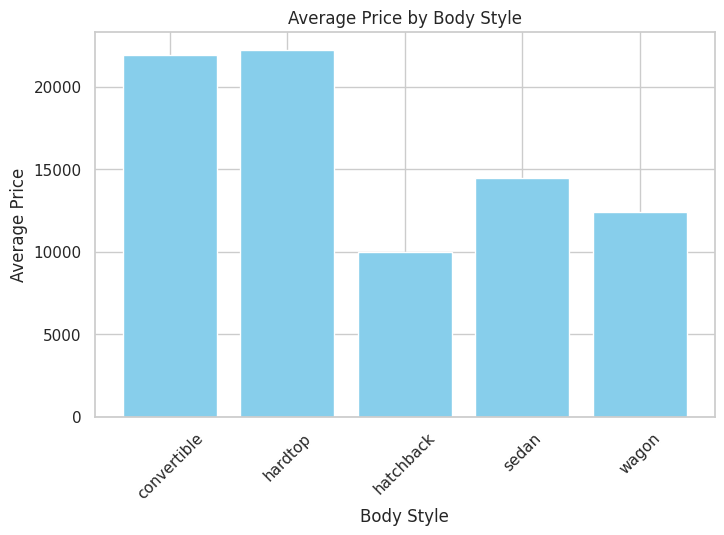

In [ ]:
# Graficamos los precios promedio por tipo de carrocería
plt.figure(figsize=(8, 5))
plt.bar(grouped_test_bodystyle['body-style'], grouped_test_bodystyle['price'], color='skyblue')
plt.xlabel("Body Style")
plt.ylabel("Average Price")
plt.title("Average Price by Body Style")
plt.xticks(rotation=45)
plt.show()

Esta gráfica de barras muestra el precio promedio por tipo de carrocería.

# **7. Correlación y causalidad**

En el análisis de datos, es fundamental entender la diferencia entre **correlación** y **causalidad**:

- **Correlación**: Mide el grado de interdependencia entre dos variables.
- **Causalidad**: Representa la relación causa-efecto entre dos variables.

Es importante recordar que **correlación no implica causalidad**. Determinar la correlación es más sencillo que demostrar una relación causal, ya que esta última generalmente requiere experimentación independiente.





## Correlación de **`Pearson`**

La **Correlación de Pearson** mide la dependencia lineal entre dos variables, obteniendo un coeficiente entre -1 y 1:

- **1**: Correlación lineal positiva perfecta.
- **0**: No hay correlación lineal.
- **-1**: Correlación lineal negativa perfecta.

En Python, podemos calcular la correlación de Pearson utilizando la función `corr()`, que por defecto usa este método:

In [ ]:
# df es nuestro DataFrame
correlaciones = df.select_dtypes(include=['number']).corr()
print(correlaciones)

                   symboling  normalized-losses  wheel-base    length  \
symboling           1.000000           0.466264   -0.535987 -0.365404   
normalized-losses   0.466264           1.000000   -0.056661  0.019424   
wheel-base         -0.535987          -0.056661    1.000000  0.876024   
length             -0.365404           0.019424    0.876024  1.000000   
width              -0.242423           0.086802    0.814507  0.857170   
height             -0.550160          -0.373737    0.590742  0.492063   
curb-weight        -0.233118           0.099404    0.782097  0.880665   
engine-size        -0.110581           0.112360    0.572027  0.685025   
bore               -0.140019          -0.029862    0.493244  0.608971   
stroke             -0.008245           0.055563    0.158502  0.124139   
compression-ratio  -0.182196          -0.114713    0.250313  0.159733   
horsepower          0.075819           0.217299    0.371147  0.579821   
peak-rpm            0.279740           0.239543   -

### **Significancia estadística: Valor P (`P-value`)**

El **valor p** indica la probabilidad de que la correlación observada sea significativa. Generalmente, usamos un nivel de significancia de **0.05**, lo que implica un **95% de confianza** en que la correlación es real.

Interpretación del valor p:

- **p <= 0.001**: Evidencia fuerte de que la correlación es significativa.
- **p <= 0.05**: Evidencia moderada de significancia.
- **p <= 0.1**: Evidencia débil de significancia.
- **p > 0.1**: No hay evidencia de correlación significativa.

Podemos calcular el **coeficiente de Pearson** y su **valor p** usando la biblioteca `scipy`:





In [ ]:
from scipy import stats

# Ejemplo: Calcular la correlación entre 'price' y 'horsepower'
pearson_coef, p_value = stats.pearsonr(df['price'], df['horsepower'])

print(f'Coeficiente de Pearson: {pearson_coef}, Valor P: {p_value}')

Coeficiente de Pearson: 0.8095745670036559, Valor P: 6.369057428259557e-48


**Verificar valores nulos**

Si la columna '`price`' o '`horsepower`' tiene valores nulos o datos no numéricos, podría generar un error. Para limpiarlo:

In [ ]:
df[['price', 'horsepower']] = df[['price', 'horsepower']].apply(pd.to_numeric, errors='coerce')
df.dropna(subset=['price', 'horsepower'], inplace=True)

In [ ]:
# Calcular nuevamente la correlación entre 'price' y 'horsepower'
pearson_coef, p_value = stats.pearsonr(df['price'], df['horsepower'])

print(f'Coeficiente de Pearson: {pearson_coef}, Valor P: {p_value}')

Coeficiente de Pearson: 0.8095745670036559, Valor P: 6.369057428259557e-48


### **Visualizar la correlación**

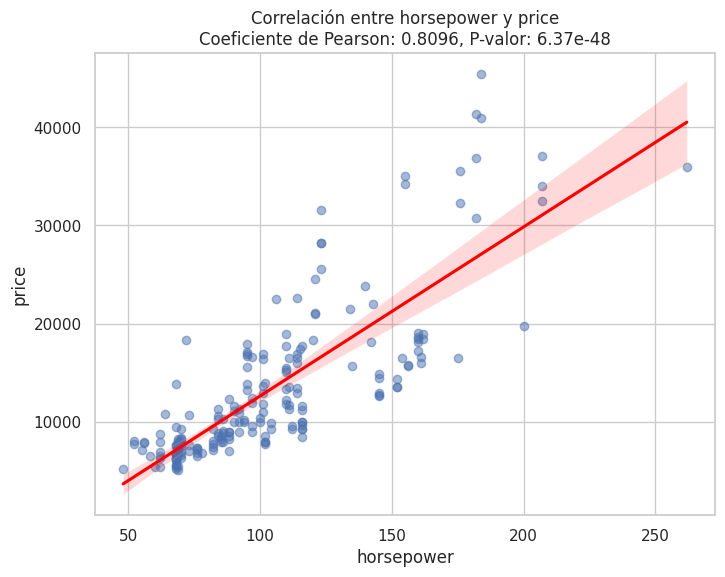

In [ ]:
var1 = 'horsepower'  # Ejemplo de variable
var2 = 'price'       # Ejemplo de variable

# Calcular coeficiente de Pearson y valor p
pearson_coef, p_value = stats.pearsonr(df[var1], df[var2])

# Crear gráfico de dispersión con línea de regresión
plt.figure(figsize=(8,6))
sns.regplot(x=df[var1], y=df[var2], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# Agregar título e información de correlación
plt.title(f'Correlación entre {var1} y {var2}\nCoeficiente de Pearson: {pearson_coef:.4f}, P-valor: {p_value:.2e}')
plt.xlabel(var1)
plt.ylabel(var2)

# Mostrar gráfico
plt.show()

**Interpretación del resultado**

Dado que el coeficiente de Pearson es 0.8096, podemos decir que existe una correlación positiva fuerte entre las dos variables. Esto significa que, en general, cuando una de las variables aumenta, la otra también tiende a aumentar.

El valor P es 6.37 × 10⁻⁴⁸, un número extremadamente pequeño. Esto indica que la correlación es estadísticamente significativa, ya que es mucho menor que el umbral común de 0.05. En otras palabras, la probabilidad de que esta correlación sea producto del azar es prácticamente nula.



### **Conclusión**

Existe una relación lineal fuerte y positiva entre las dos variables.
La correlación es estadísticamente significativa.
Aunque la correlación es alta, no implica causalidad. Es decir, el aumento en una variable no necesariamente causa el aumento en la otra; podrían existir otros factores involucrados.


# 📊 **Análisis de correlación: Wheel-Base vs. Price**

En este ejercicio, exploraremos la relación entre la variable **Wheel-Base** (Base de ruedas) y **Price** (Precio) en un conjunto de datos de automóviles.  

Utilizaremos el **coeficiente de correlación de Pearson** para cuantificar la relación entre estas variables y visualizaremos los resultados mediante un **gráfico de dispersión con línea de regresión**.




### 📌 **Cálculo de la correlación de `Pearson`**
La Correlación de Pearson se calcula con la función `pearsonr()` del módulo `scipy.stats`:

In [ ]:
# Calcular el coeficiente de correlación de Pearson y el valor p
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])

# Imprimir los resultados
print(f"Coeficiente de Pearson: {pearson_coef}")
print(f"Valor P: {p_value}")

Coeficiente de Pearson: 0.584641822265508
Valor P: 8.076488270732885e-20


**Interpretación de los resultados**

**Coeficiente de `Pearson` (r):**

Si r está cerca de 1, la relación es positiva fuerte.

Si r está cerca de -1, la relación es negativa fuerte.

Si r está cerca de 0, no hay relación lineal.
Valor P (p-value):

Si p-value < 0.05, la correlación es estadísticamente significativa.
Si p-value >= 0.05, no hay suficiente evidencia estadística para concluir que existe una correlación significativa.

**Visualización de la correlación**

Para visualizar la relación entre `Wheel-Base` y `Price` , creamos un diagrama de dispersión con una línea de regresión:

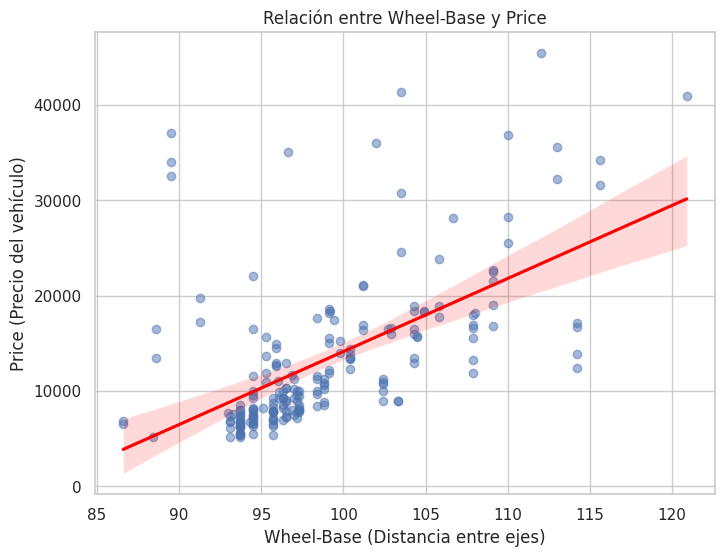

In [ ]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(8,6))

# Crear el diagrama de dispersión con línea de regresión
sns.regplot(x=df['wheel-base'], y=df['price'], scatter_kws={'alpha':0.5}, line_kws={"color": "red"})

# Agregar título y etiquetas
plt.title("Relación entre Wheel-Base y Price")
plt.xlabel("Wheel-Base (Distancia entre ejes)")
plt.ylabel("Price (Precio del vehículo)")

# Mostrar el gráfico
plt.show()

Los puntos representan las observaciones de los datos.

La línea roja representa la tendencia lineal entre las dos variables.

Si los puntos están cercanos a la línea, la recomendación es fuerte.

Si los puntos están dispersos, la potencia es débil.

**Conclusión**

El análisis de evaluación entre la distancia entre ejes (Wheel-Base) y el precio del vehículo (Price) muestra una compensación positiva moderada con un coeficiente de Pearson de 0.5846. Esto indica que, en general, los vehículos con mayor distancia entre ejes tienden a tener precios más altos.

El valor P extremadamente bajo (8.08e-20) confirma que esta evaluación es estadísticamente significativa, lo que significa que la relación observada no es producto del azar.

Sin embargo, debido a que la clasificación no implica causalidad, este resultado no significa que un mayor Wheel-Base cause directamente un aumento en el precio. Otras variables, como el tipo de motor, la marca y las características del vehículo, también pueden influir en el precio.


##🎉 **¡Felicidades por completar esta práctica!** 🎉

HaS dado un gran paso en el análisis de datos. Cada aprendizaje te acerca más a convertirte en un experto en el tema. 🚀

✨ "*El aprendizaje nunca agota la mente*." — **Leonardo da Vinci** ✨

¡Sigue explorando, cuestionando y descubriendo nuevas conexiones en los datos! 📊💡